# **Trabalho NLP**
Análise de Reclamações

Curso: BI Master 

Disciplina: BI 

Professor: Leonardo Mendoza

Aluna: Ana Paula Costa Assumpção

Matricula: 221100813

# Processamento Inicial

### Importação das bibliotecas

In [221]:
import nltk
import pandas as pd
import os
import numpy as np
import string
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
%matplotlib inline

### Define o diretório de trabalho

Os seguintes arquivos são necessários e foram inseridos no ambiente do Colaboratory:

`base reclamações.csv`



Imagens para o WordCloud:

`atencao.jpg`

`mapa_do_brasil.jpg`

`reclamacao.jpg`


In [222]:
#workdir_path = '/mnt/5bdd0b49-a2cd-495d-a27b-f4810abd97ca/home/osias/Projects/'+\
#'Processamento de linguagem natural/Trabalho BI 2019'
#os.chdir(workdir_path)

### Leitura da base de reclamações

In [223]:
data = pd.read_csv('base reclamações.csv',encoding='windows-1252',sep =';')
# verificação visual das 5 primeiras linhas
data.tail()

,Regiao,estado,empresa,subsidiaria,area,serviço,problema,faixa etarea
42302,Sudeste,SP,B2W COMPANHIA DIGITAL,AMERICANAS.COM/SUBMARINO/SHOPTIME/SOUBARATO,COMÉRCIO VAREJISTA DE OUTROS PRODUTOS NÃO ESPE...,Microcomputador / Produtos de Informática,Não entrega/demora na entrega do produto,Nao Informada
42303,Sudeste,SP,ADIDAS DO BRASIL LTDA,ADIDAS.COM.BR,COMÉRCIO ATACADISTA DE CALÇADOS,Vestuário ( Calçado / Roupa ),Não entrega/demora na entrega do produto,entre 31 a 40 anos
42304,Sudeste,SP,RN COMERCIO VAREJISTA S/A,RICARDOELETRO.COM.BR/INSINUANTE.COM/ELETROSHOP...,COMÉRCIO VAREJISTA ESPECIALIZADO DE ELETRODOMÉ...,"Acessório Para Vestuário ( Bolsa, Cinto, Chapé...",Produto entregue diferente do pedido,entre 21 a 30 anos
42305,Sudeste,SP,DECOLAR.COM LTDA,AGÊNCIA DECOLAR,AGÊNCIAS DE VIAGENS,Agências e Operadoras de viagens (pacotes turí...,Recusa injustificada em prestar serviço,Nao Informada
42306,Sudeste,SP,ESAB ESCOLA SUPERIOR ABERTA DO BRASIL LTDA,NaN,EDUCAÇÃO SUPERIOR - GRADUAÇÃO E PÓS-GRADUAÇÃO,"Escola ( Pré, 1º, 2º Graus e Superior )",Serviço não fornecido (entrega/instalação/não ...,entre 31 a 40 anos


### Quantidade de linhas e de colunas do dataframe lido

In [224]:
data.shape

(42307, 8)

## Colunas da tabela

In [225]:
data.columns

Index(['Regiao ', 'estado', 'empresa', 'subsidiaria  ', 'area ', 'serviço',
       'problema', 'faixa etarea'],
      dtype='object')

### Localização das colunas com valores "null"

In [226]:
data.isnull().sum()

Regiao              0
estado              0
empresa             1
subsidiaria      6530
area             5329
serviço             0
problema         8936
faixa etarea        0
dtype: int64

# Análise, Limpeza e Pré-Processamento

### Separação das colunas empresa, estado e serviço




In [227]:
df_empresa = pd.DataFrame()
df_empresa['empresa'] = data['empresa']

df_estado = pd.DataFrame()
df_estado['estado'] = data['estado']

df_servico = pd.DataFrame()
df_servico['serviço'] = data['serviço']

df_problema = pd.DataFrame()
df_problema['problema'] = data['problema']

### Verificação se há algum "null"

In [228]:
df_empresa.isnull().sum()

empresa    1
dtype: int64

In [229]:
df_estado.isnull().sum()


estado    0
dtype: int64

In [230]:
df_servico.isnull().sum()

serviço    0
dtype: int64

In [231]:
df_problema.isnull().sum()

problema    8936
dtype: int64

### Remoção dos "nulls" encontrados
Somente o atributo empresa possui nulos e 1 registro somente. Então a solução escolhida foi remoção desse registro. 

In [232]:
df_empresa.dropna(inplace=True)
df_empresa.isnull().sum()

empresa    0
dtype: int64

# Verificação dos valores distintos de cada um dos atributos 

In [233]:
df_empresa['empresa'].value_counts()

TELEFONICA BRASIL S/A                                              846
CLARO S/A                                                          752
ELETROPAULO METROPOLITANA ELETRICIDADE DE S PAULO                  480
TIM CELULAR S/A                                                    461
CAIXA ECONOMICA FEDERAL                                            419
                                                                  ... 
SERVICO MUNICIPAL DE SANEAMENTO AMBIENTAL DE SANTO ANDRE SEMASA      1
TEREZA ALVES DOS SANTOS                                              1
IDeT BRASIL EVENTOS LTDA                                             1
COMPANHIA DE HABITAÇÃO DO ESTADO DE MINAS GERAIS                     1
ESAB ESCOLA SUPERIOR ABERTA DO BRASIL LTDA                           1
Name: empresa, Length: 11214, dtype: int64

In [234]:
df_estado['estado'].value_counts()

SP    8127
GO    7764
MS    4723
RN    4073
MT    3972
MG    3460
PI    2153
RO    2057
SC    1955
CE    1766
ES     828
TO     567
PA     341
PB     302
MA     126
RS      90
PE       3
Name: estado, dtype: int64

In [235]:

df_servico['serviço'].value_counts()


Telefone ( Convencional, Celular, Interfone, Etc. )                                                                                               5149
Telefonia Celular                                                                                                                                 3037
Telefonia Fixa ( Plano de Expansão / Compra e Venda / Locação )                                                                                   2713
Banco comercial                                                                                                                                   2313
Cartão de Crédito                                                                                                                                 2274
                                                                                                                                                  ... 
Farináceos (fubá, polvilho, etc.)                                                             

In [236]:

df_problema['problema'].value_counts()

Produto com vício                                     6043
Cobrança indevida/abusiva                             4695
Cobrança indevida.                                    3272
Peso, volume e quantidade                             1726
Garantia (Abrangência, cobertura, etc.)               1438
                                                      ... 
Revisional de aluguel                                    1
Recusa no recebimento do aluguel/prestação               1
Cobiling                                                 1
Presença de sujidades, larvas e objetos estranhos.       1
Reajuste sem previsão contratual                         1
Name: problema, Length: 167, dtype: int64

### Substitui:

#### " " por "_" (espaço)

#### "/" por "" 

#### "," por "" 

#### "(" por "" 

#### ")" por "" 

#### "-" por ""

#### "." por ""

#### "\t" por "" (tab)

### para o wordcloud funcionar

In [237]:
dicionario = {' ':'_','/':'',',':'','\(':'','\)':'',"-":'','\.':'',r"^\t":''}
df_empresa["Nome Empresa Sem Espaço"] = df_empresa.replace({'empresa': dicionario},regex=True)
df_estado["Nome Estado Sem Espaço"] = df_estado.replace({'estado': dicionario},regex=True)
df_servico["Nome Serviço Sem Espaço"] = df_servico.replace({'serviço': dicionario},regex=True)


### Converte o nome das empresas para letras minúsculas

In [238]:
df_empresa["Nome Empresa Sem Espaço"] = df_empresa["Nome Empresa Sem Espaço"].str.lower()
df_estado["Nome Estado Sem Espaço"] = df_estado["Nome Estado Sem Espaço"].str.lower()
df_servico["Nome Serviço Sem Espaço"] = df_servico["Nome Serviço Sem Espaço"].str.lower()

### Apreciação inicial do que foi obtido

In [239]:
print (df_empresa.groupby("Nome Empresa Sem Espaço").size().sort_values(ascending=False))

Nome Empresa Sem Espaço
telefonica_brasil_sa                                  1150
claro_sa                                              1125
tim_celular_sa                                         786
via_varejo_sa                                          516
eletropaulo_metropolitana_eletricidade_de_s_paulo      480
                                                      ... 
flynt_consultoria_comercial__eireli                      1
fls_educacional_consultoria_e_assessoria_em_inform       1
flp_comercial_de_medicamentos_ltda_me                    1
florismagno_dos_santos_cerqueira__me                     1
única_brasilia_automoveis_ltda_smaff_ford                1
Length: 10607, dtype: int64


In [240]:
print (df_estado.groupby("Nome Estado Sem Espaço").size().sort_values(ascending=False))

Nome Estado Sem Espaço
sp    8127
go    7764
ms    4723
rn    4073
mt    3972
mg    3460
pi    2153
ro    2057
sc    1955
ce    1766
es     828
to     567
pa     341
pb     302
ma     126
rs      90
pe       3
dtype: int64


In [241]:
print (df_servico.groupby("Nome Serviço Sem Espaço").size().sort_values(ascending=False))

Nome Serviço Sem Espaço
telefone__convencional_celular_interfone_etc_                                                                        5149
telefonia_celular                                                                                                    3037
telefonia_fixa__plano_de_expansão__compra_e_venda__locação_                                                          2713
banco_comercial                                                                                                      2313
cartão_de_crédito                                                                                                    2274
                                                                                                                     ... 
profissional_liberal__veterinário                                                                                       1
charutaria__cigarro_tabaco_cachimbo_etc_                                                                                1


### Criação de uma string única com todas as palavras para cada um dos atributos: Empresa, Estado e Serviço

In [242]:
string_empresas = " ".join([text for text in df_empresa["Nome Empresa Sem Espaço"]])

In [243]:
string_estados = " ".join([text for text in df_estado["Nome Estado Sem Espaço"]])

In [245]:
string_servicos = " ".join([text for text in df_servico["Nome Serviço Sem Espaço"]])

### Geração do wordcloud das 500 empresas mais reclamadas

In [246]:
empresa_mask = np.array(Image.open("atencao.jpg"))

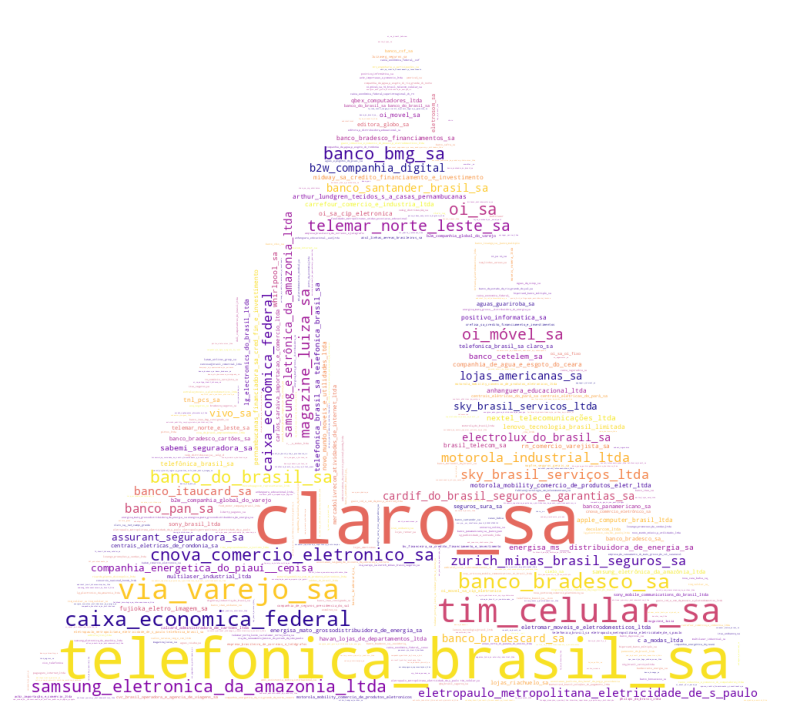

In [247]:
# Criando o objeto wordcloud com as configs necessárias
wordcloud = WordCloud(background_color='white', width=1000, colormap='plasma',
                      height=900, max_words=400, mask=empresa_mask, max_font_size=1000,
                      min_font_size=1).generate(string_empresas)


#configurando forma de apresentação do gráfico e apresentando no notebook.
fig, ax = plt.subplots(figsize=(10,9))            
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud);
plt.savefig("Empresa_wordcloud.png")
plt.show()

# Geração do wordcloud com os estados que mais tem reclamações

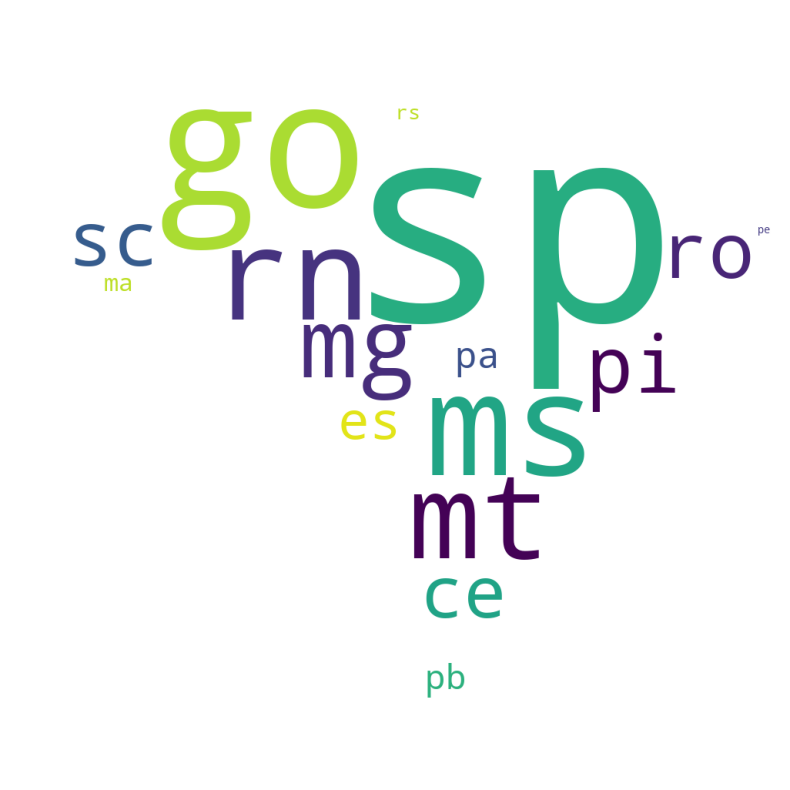

In [248]:
estado_mask = np.array(Image.open("mapa_do_brasil.jpg"))


wordcloud_estados = WordCloud(background_color="white",collocations=False,
                              colormap="viridis",
                              width = 1000,
                              height = 1000,
                              mask = estado_mask,
                               max_font_size=500).generate(string_estados)


#configurando forma de apresentação do gráfico e apresentando no notebook.
fig, ax = plt.subplots(figsize=(10,10))            
ax.imshow(wordcloud_estados, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud_estados);
plt.savefig("Estados_wordcloud.png")
plt.show()

# Geração do wordcloud com os serviços que mais tem reclamações

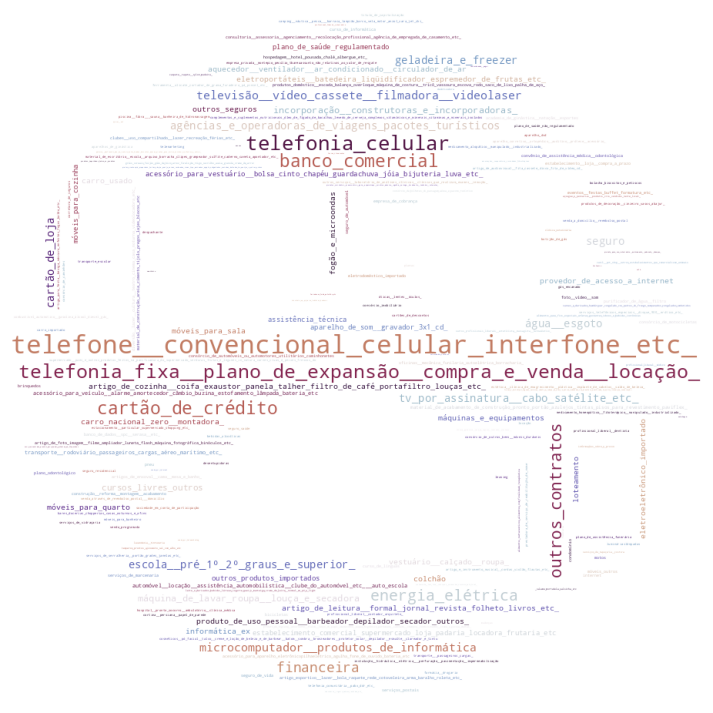

In [249]:
servico_mask = np.array(Image.open("reclamacao.jpg"))


wordcloud_servicos = WordCloud(background_color="white",collocations=False,
                              colormap="twilight",
                              width = 900,
                              height = 900    ,
                              mask = servico_mask,
                              max_font_size=1000, min_font_size=1, max_words=5000).generate(string_servicos)


#configurando forma de apresentação do gráfico e apresentando no notebook.
fig, ax = plt.subplots(figsize=(9,9))            
ax.imshow(wordcloud_servicos, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud_servicos);
plt.savefig("Servicos_wordcloud.png")
plt.show()

### Para ficar mais claro, é interessante um diagrama de barras ordenado pela quantidade decrescente de problemas, limitado aos 45 mais reclamados. 

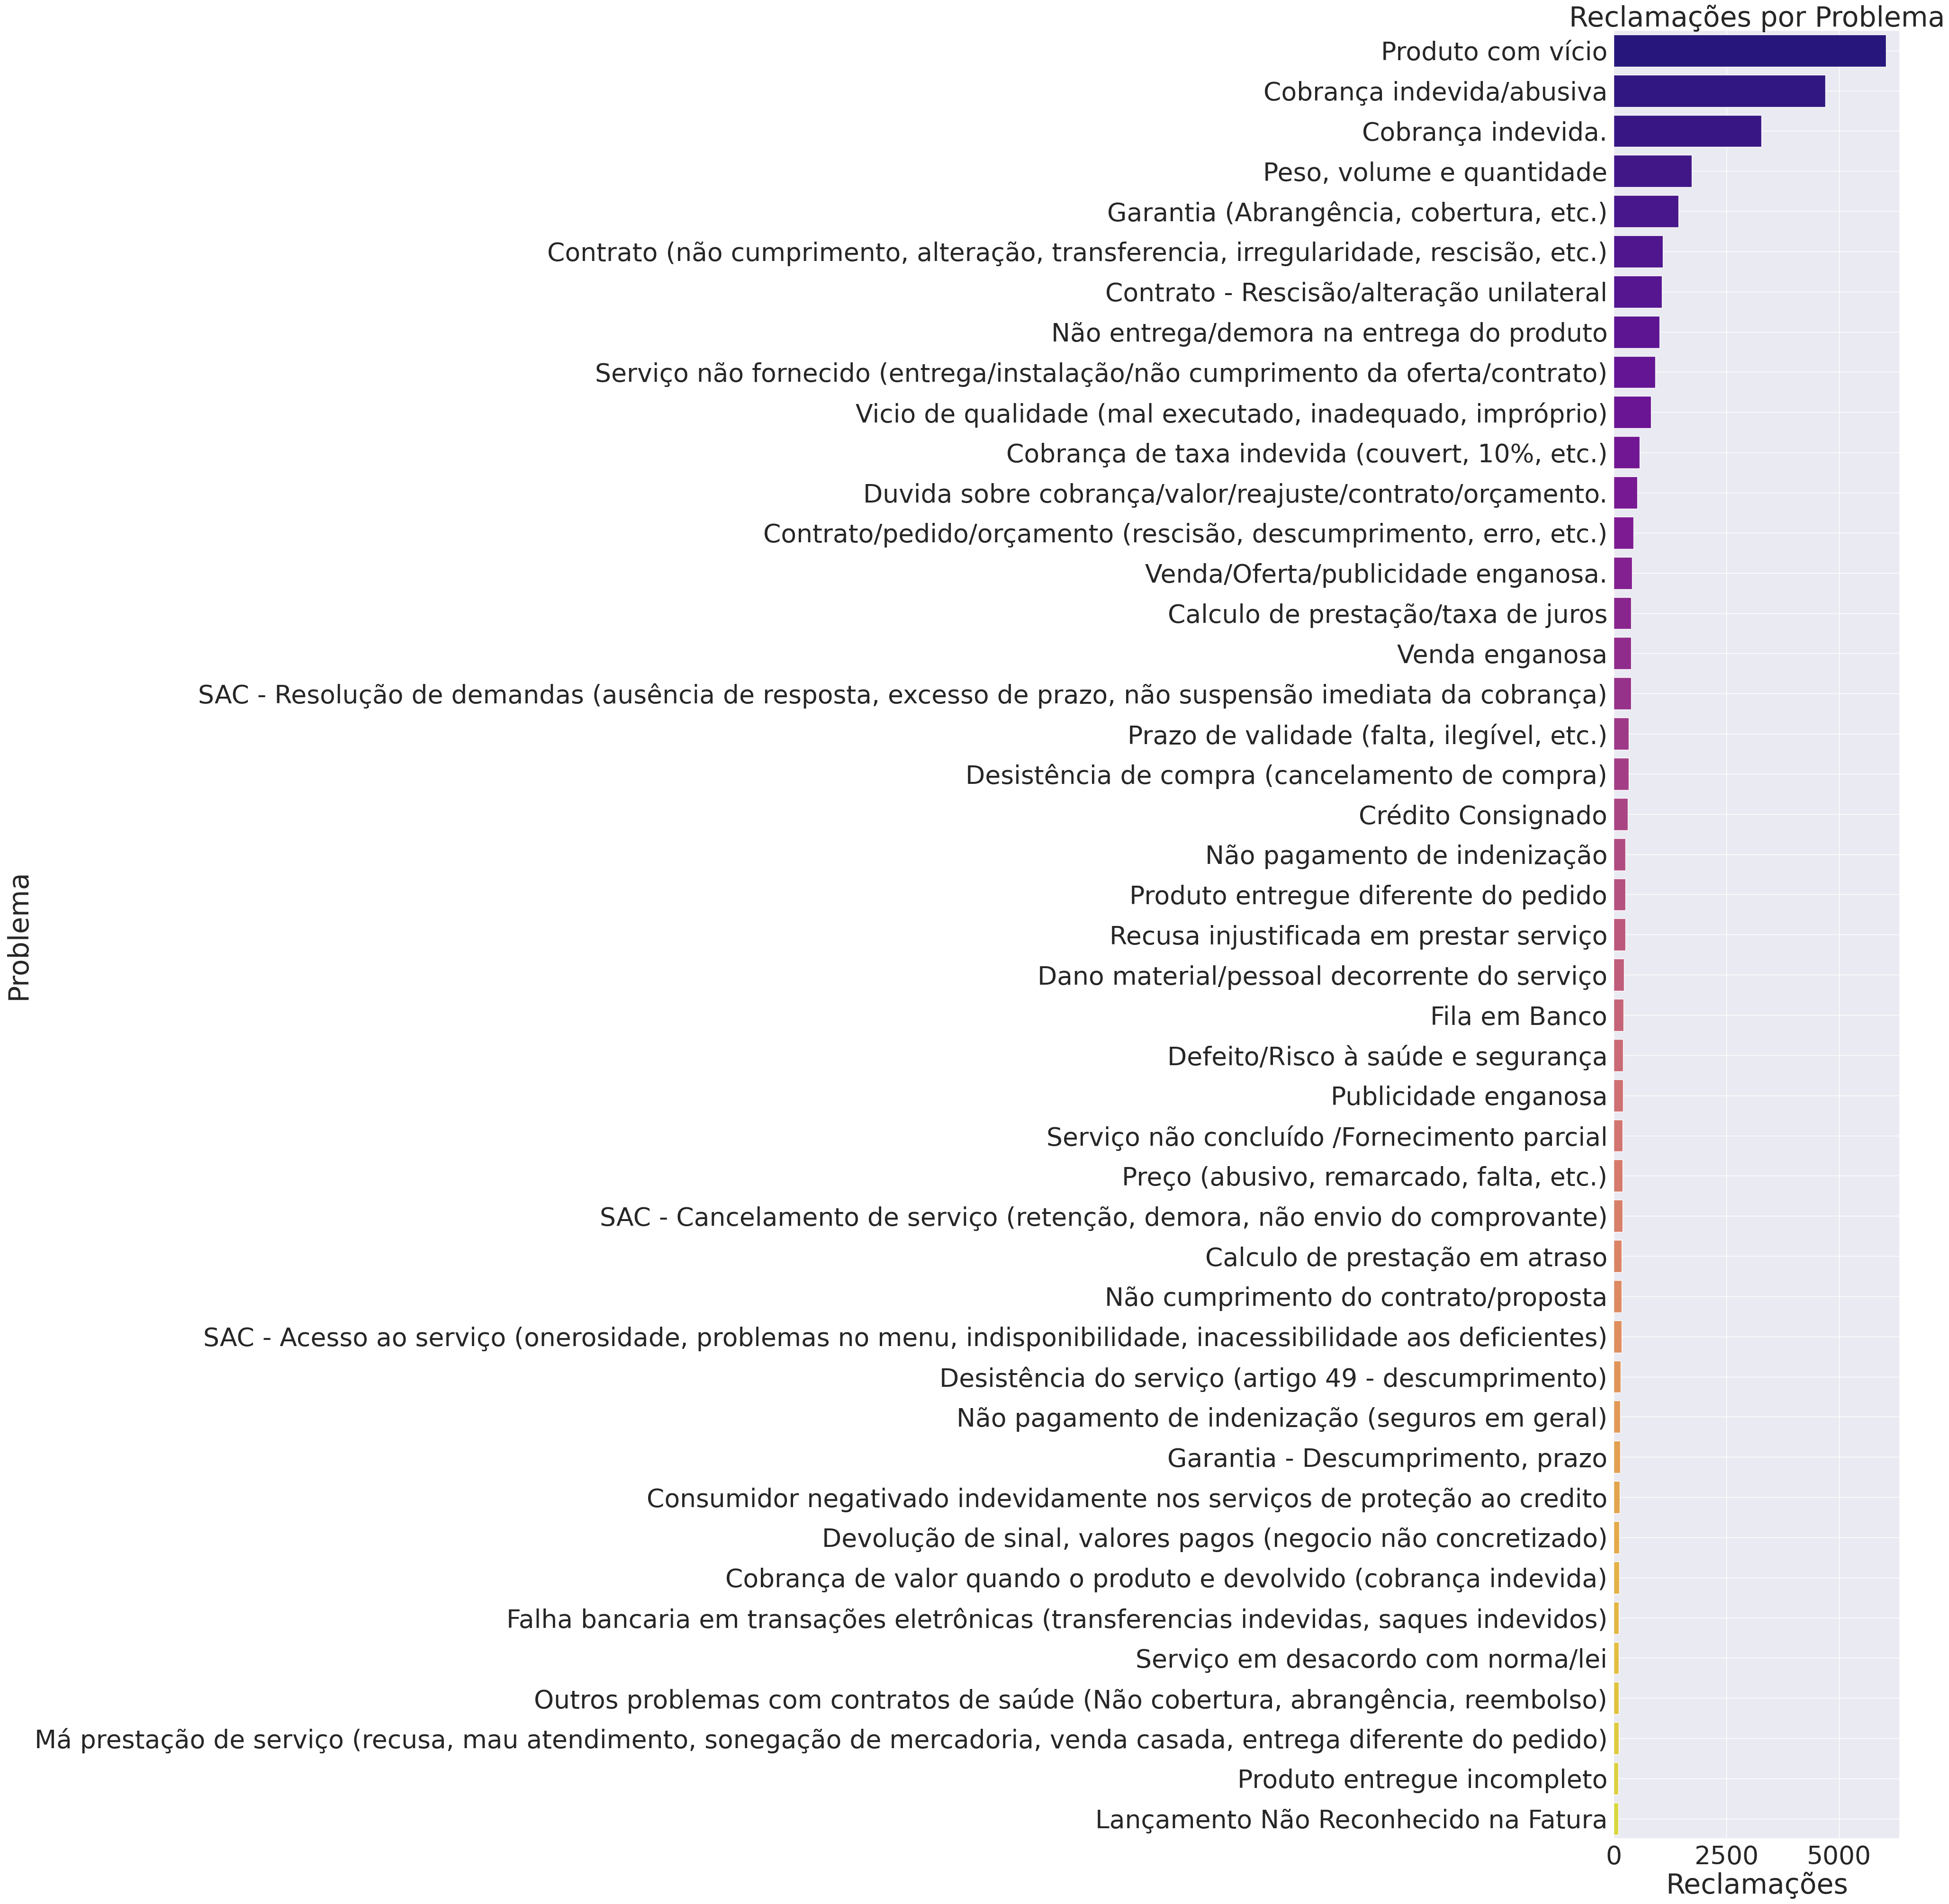

In [252]:
# Inicializa a figura do matplotlib
f, ax = plt.subplots(figsize=(40,40))
# Inicializa estilo do seaborn
sns.set(font_scale=3.5)
# carrega o dataset
graph = sns.countplot(y = "problema", data=df_problema,
              order = df_problema["problema"].value_counts().index[:45], 
              palette='plasma')


ax.grid(True)
ax.set_title("Reclamações por Problema")
ax.set_ylabel('Problema')
ax.set_xlabel('Reclamações')
plt.tight_layout(pad=0)
plt.savefig("Problema_barplot.png")
plt.show()

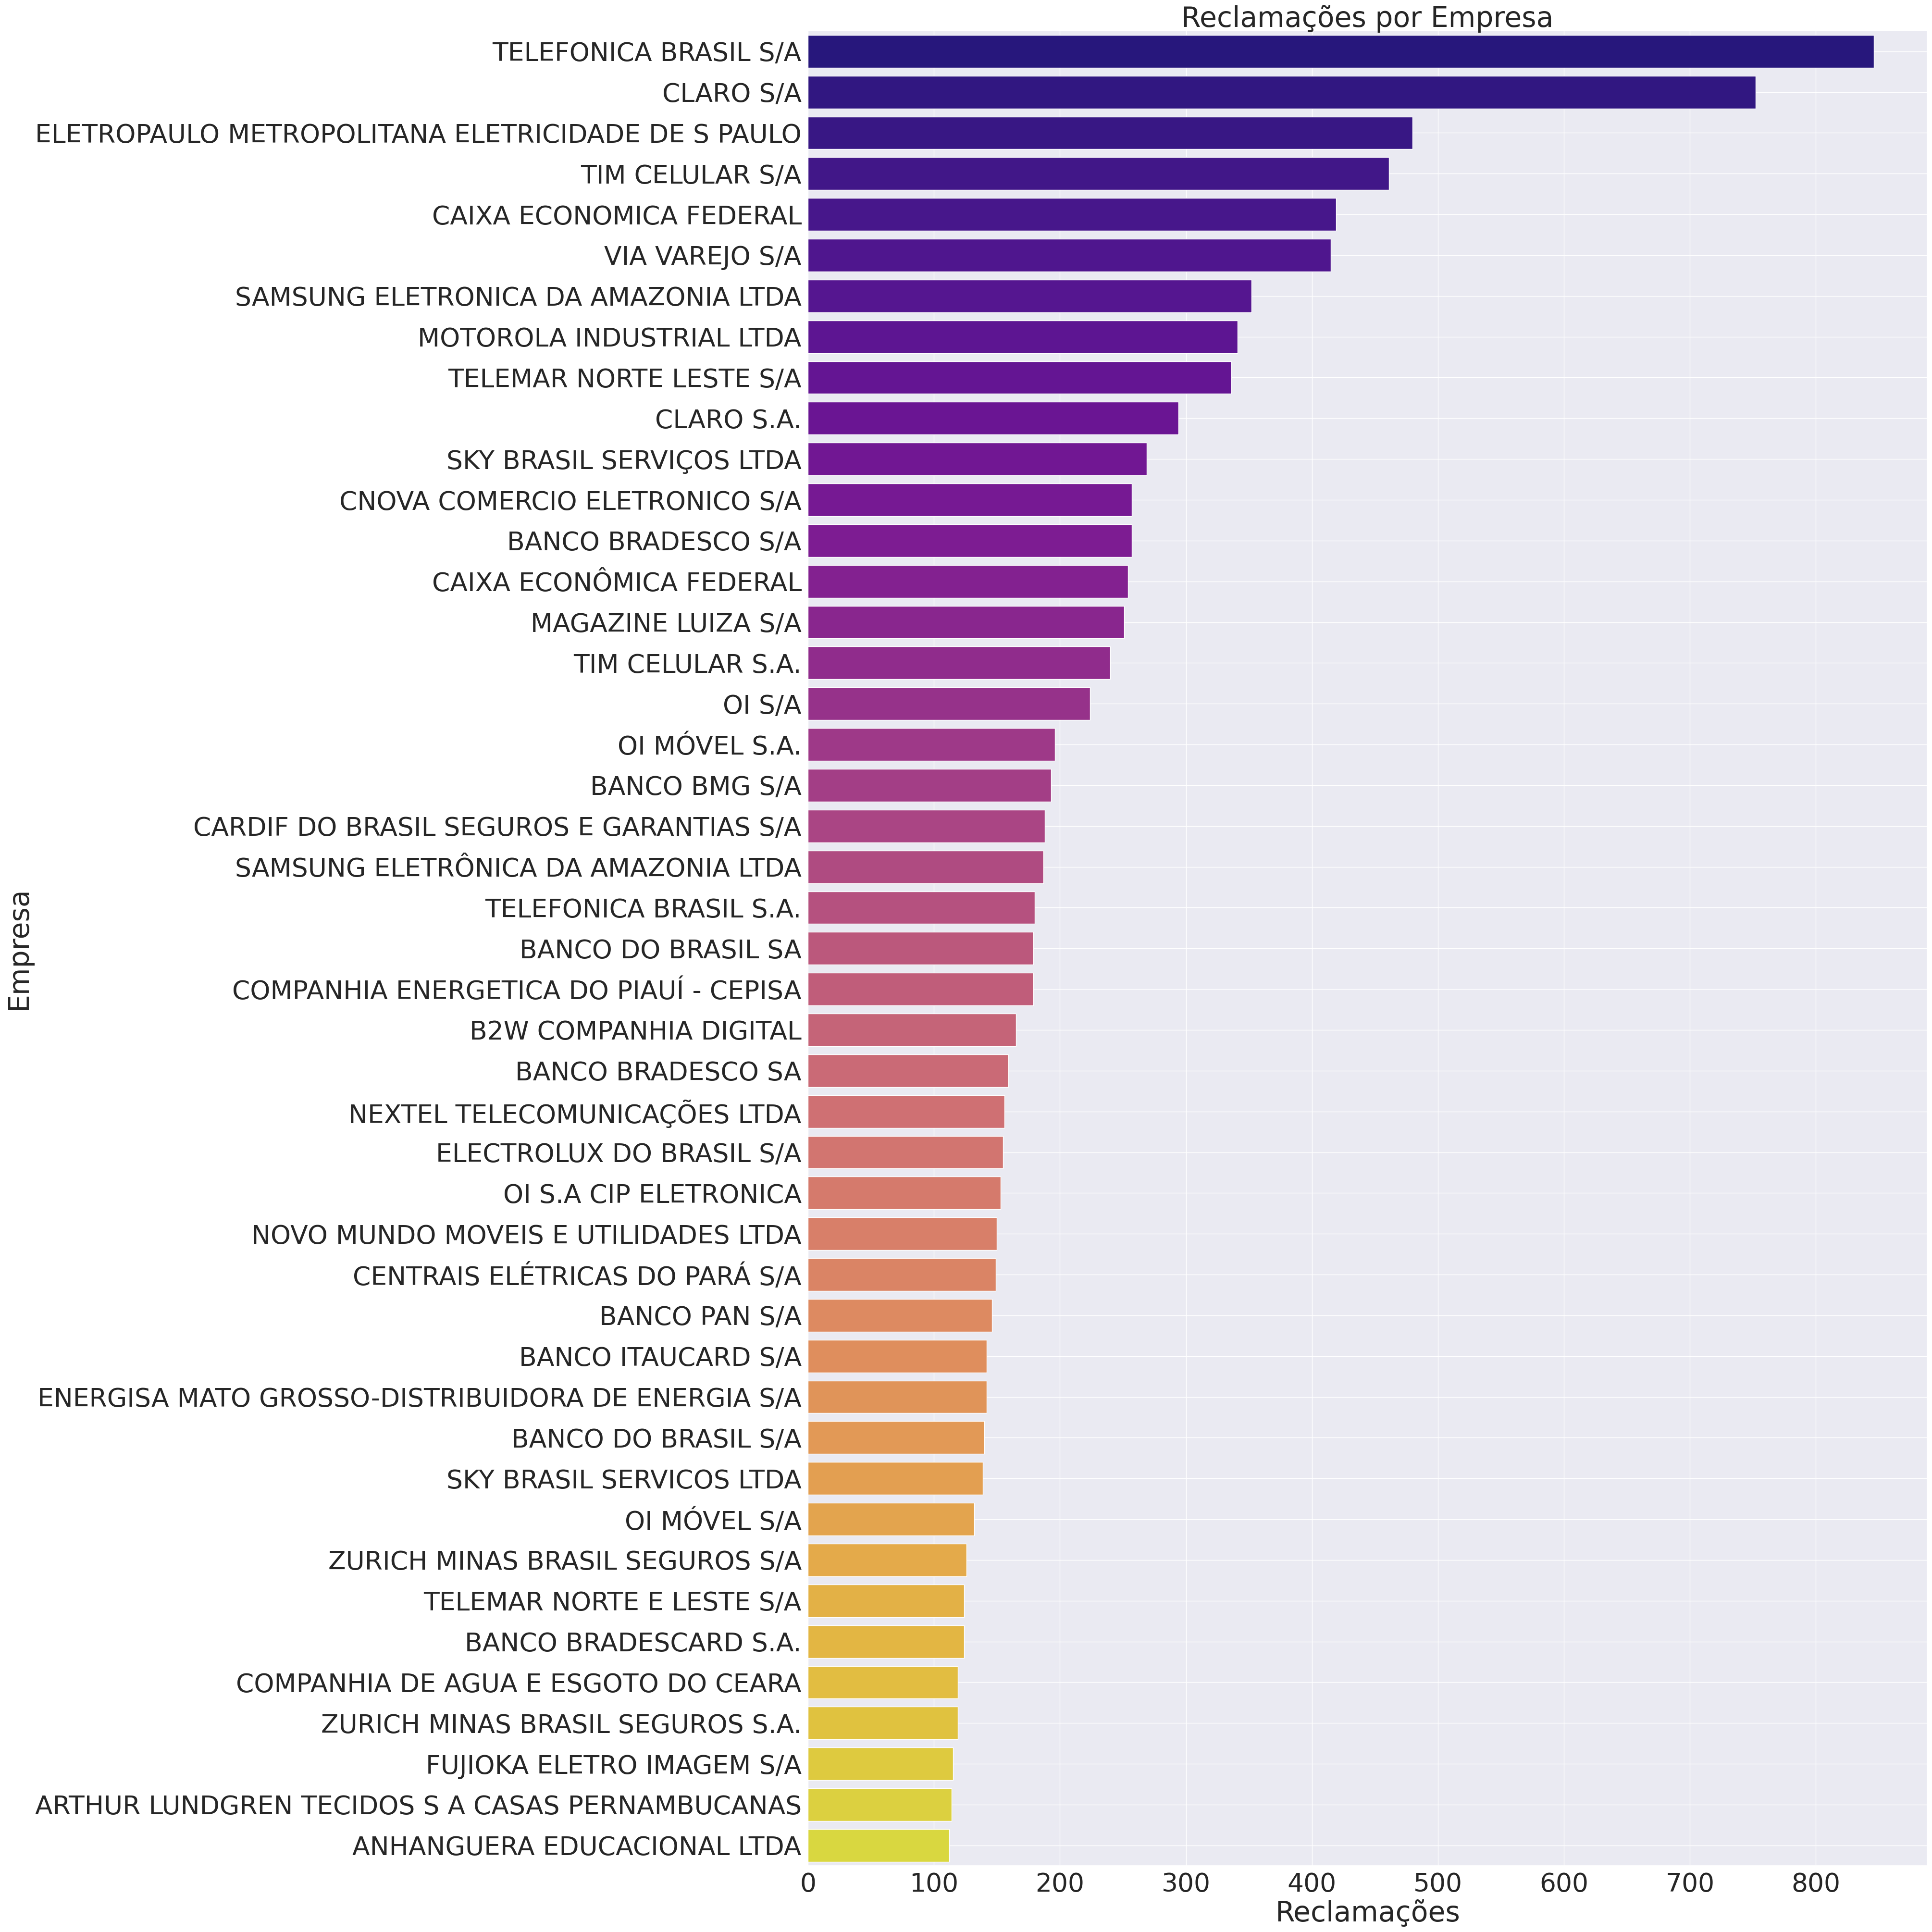

In [253]:
# Inicializa a figura do matplotlib
f, ax = plt.subplots(figsize=(40,40))
# Inicializa estilo do seaborn
sns.set(font_scale=3.5)
# carrega o dataset
graph = sns.countplot(y = "empresa", data=df_empresa,
              order = df_empresa["empresa"].value_counts().index[:45], 
              palette='plasma')


ax.grid(True)
ax.set_title("Reclamações por Empresa")
ax.set_ylabel('Empresa')
ax.set_xlabel('Reclamações')
plt.tight_layout(pad=0)
plt.savefig("Empresa_barplot.png")
plt.show()

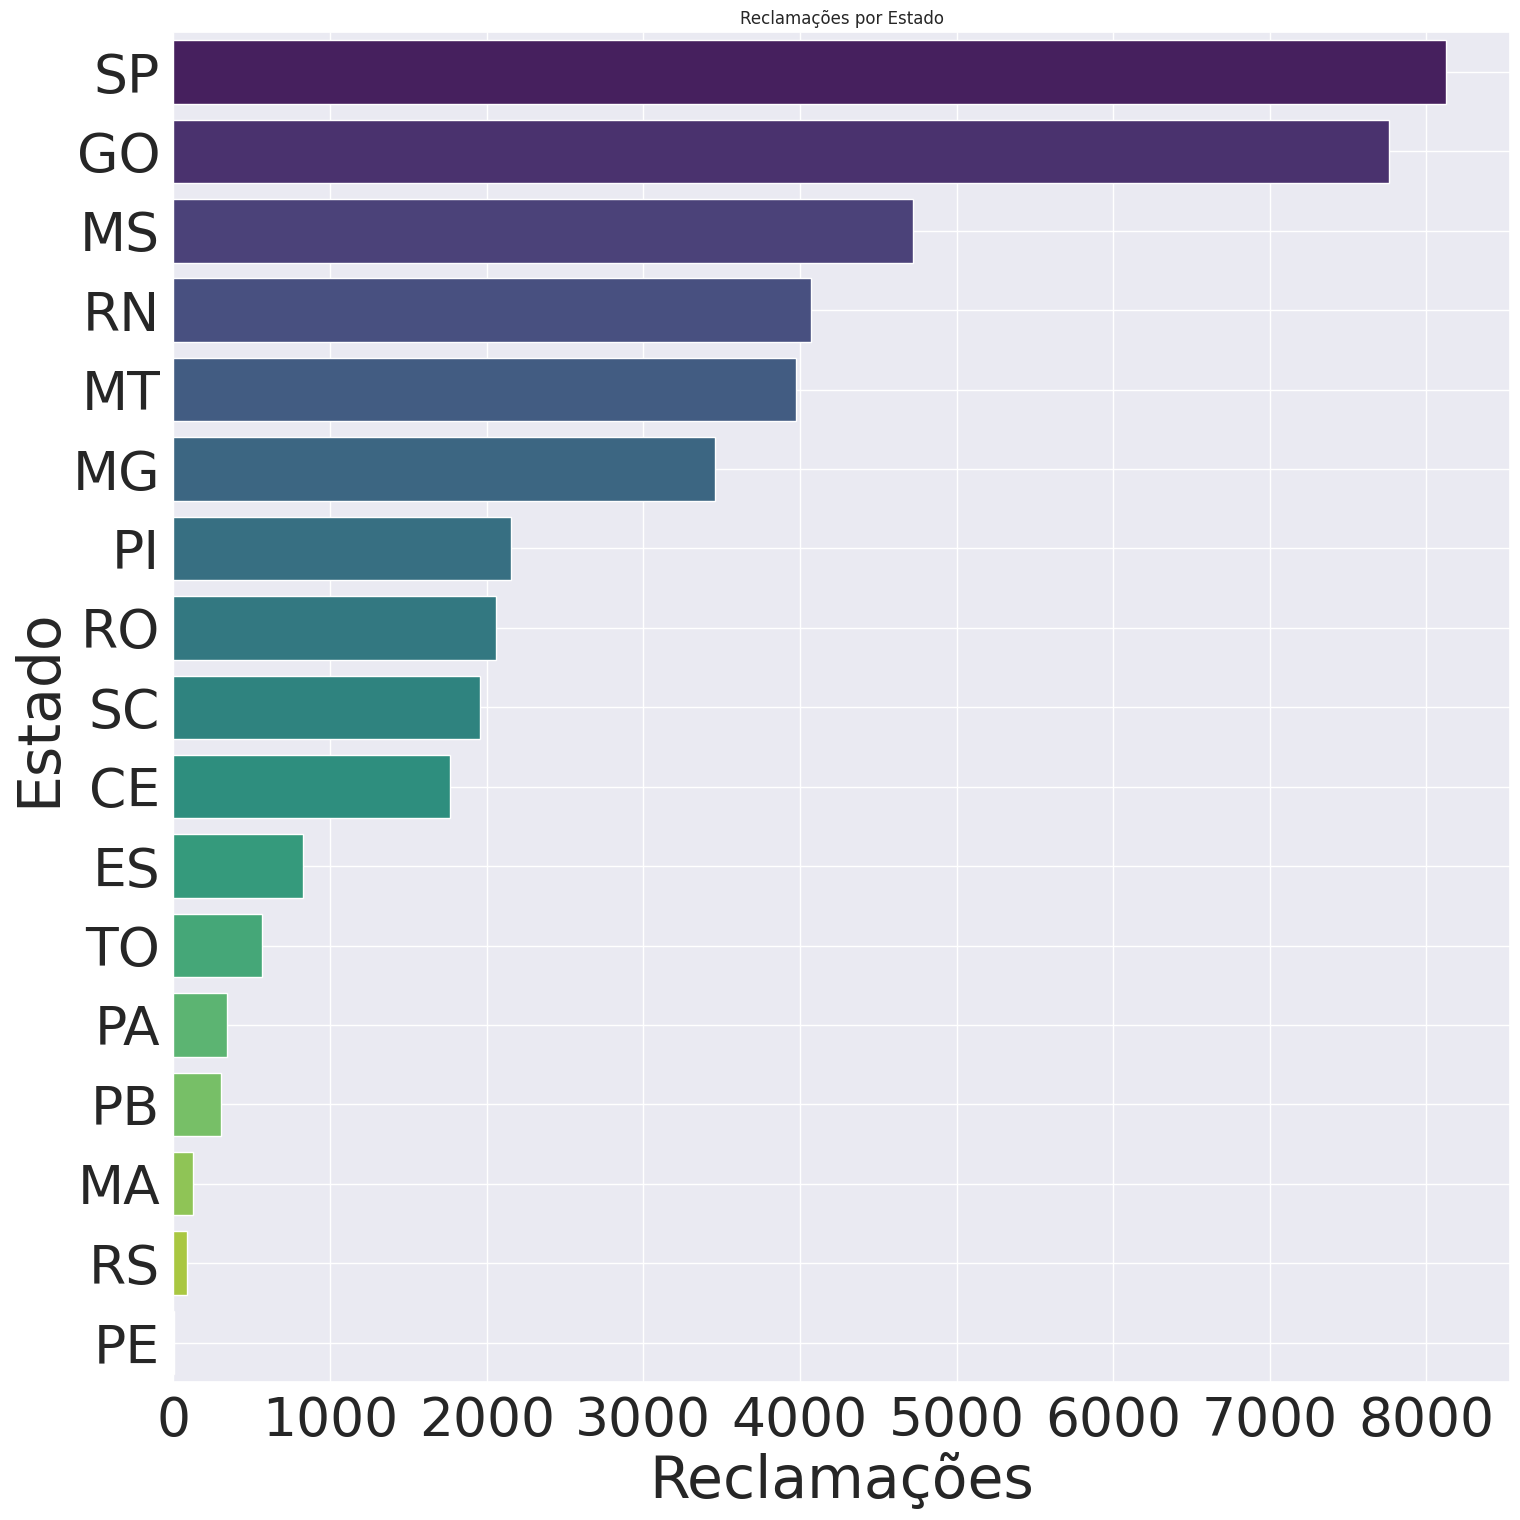

In [254]:
# Inicializa a figura do matplotlib
f, ax = plt.subplots(figsize=(15,15))
# Inicializa estilo do seaborn
sns.set(font_scale=1.0)
# carrega o dataset
graph = sns.countplot(y = "estado", data=df_estado,
              order = df_estado["estado"].value_counts().index[:45], 
              palette='viridis')


ax.grid(True)
ax.set_title("Reclamações por Estado")
ax.set_ylabel('Estado')
ax.set_xlabel('Reclamações')
plt.tight_layout(pad=0)
plt.savefig("Estado_barplot.png")
plt.show()

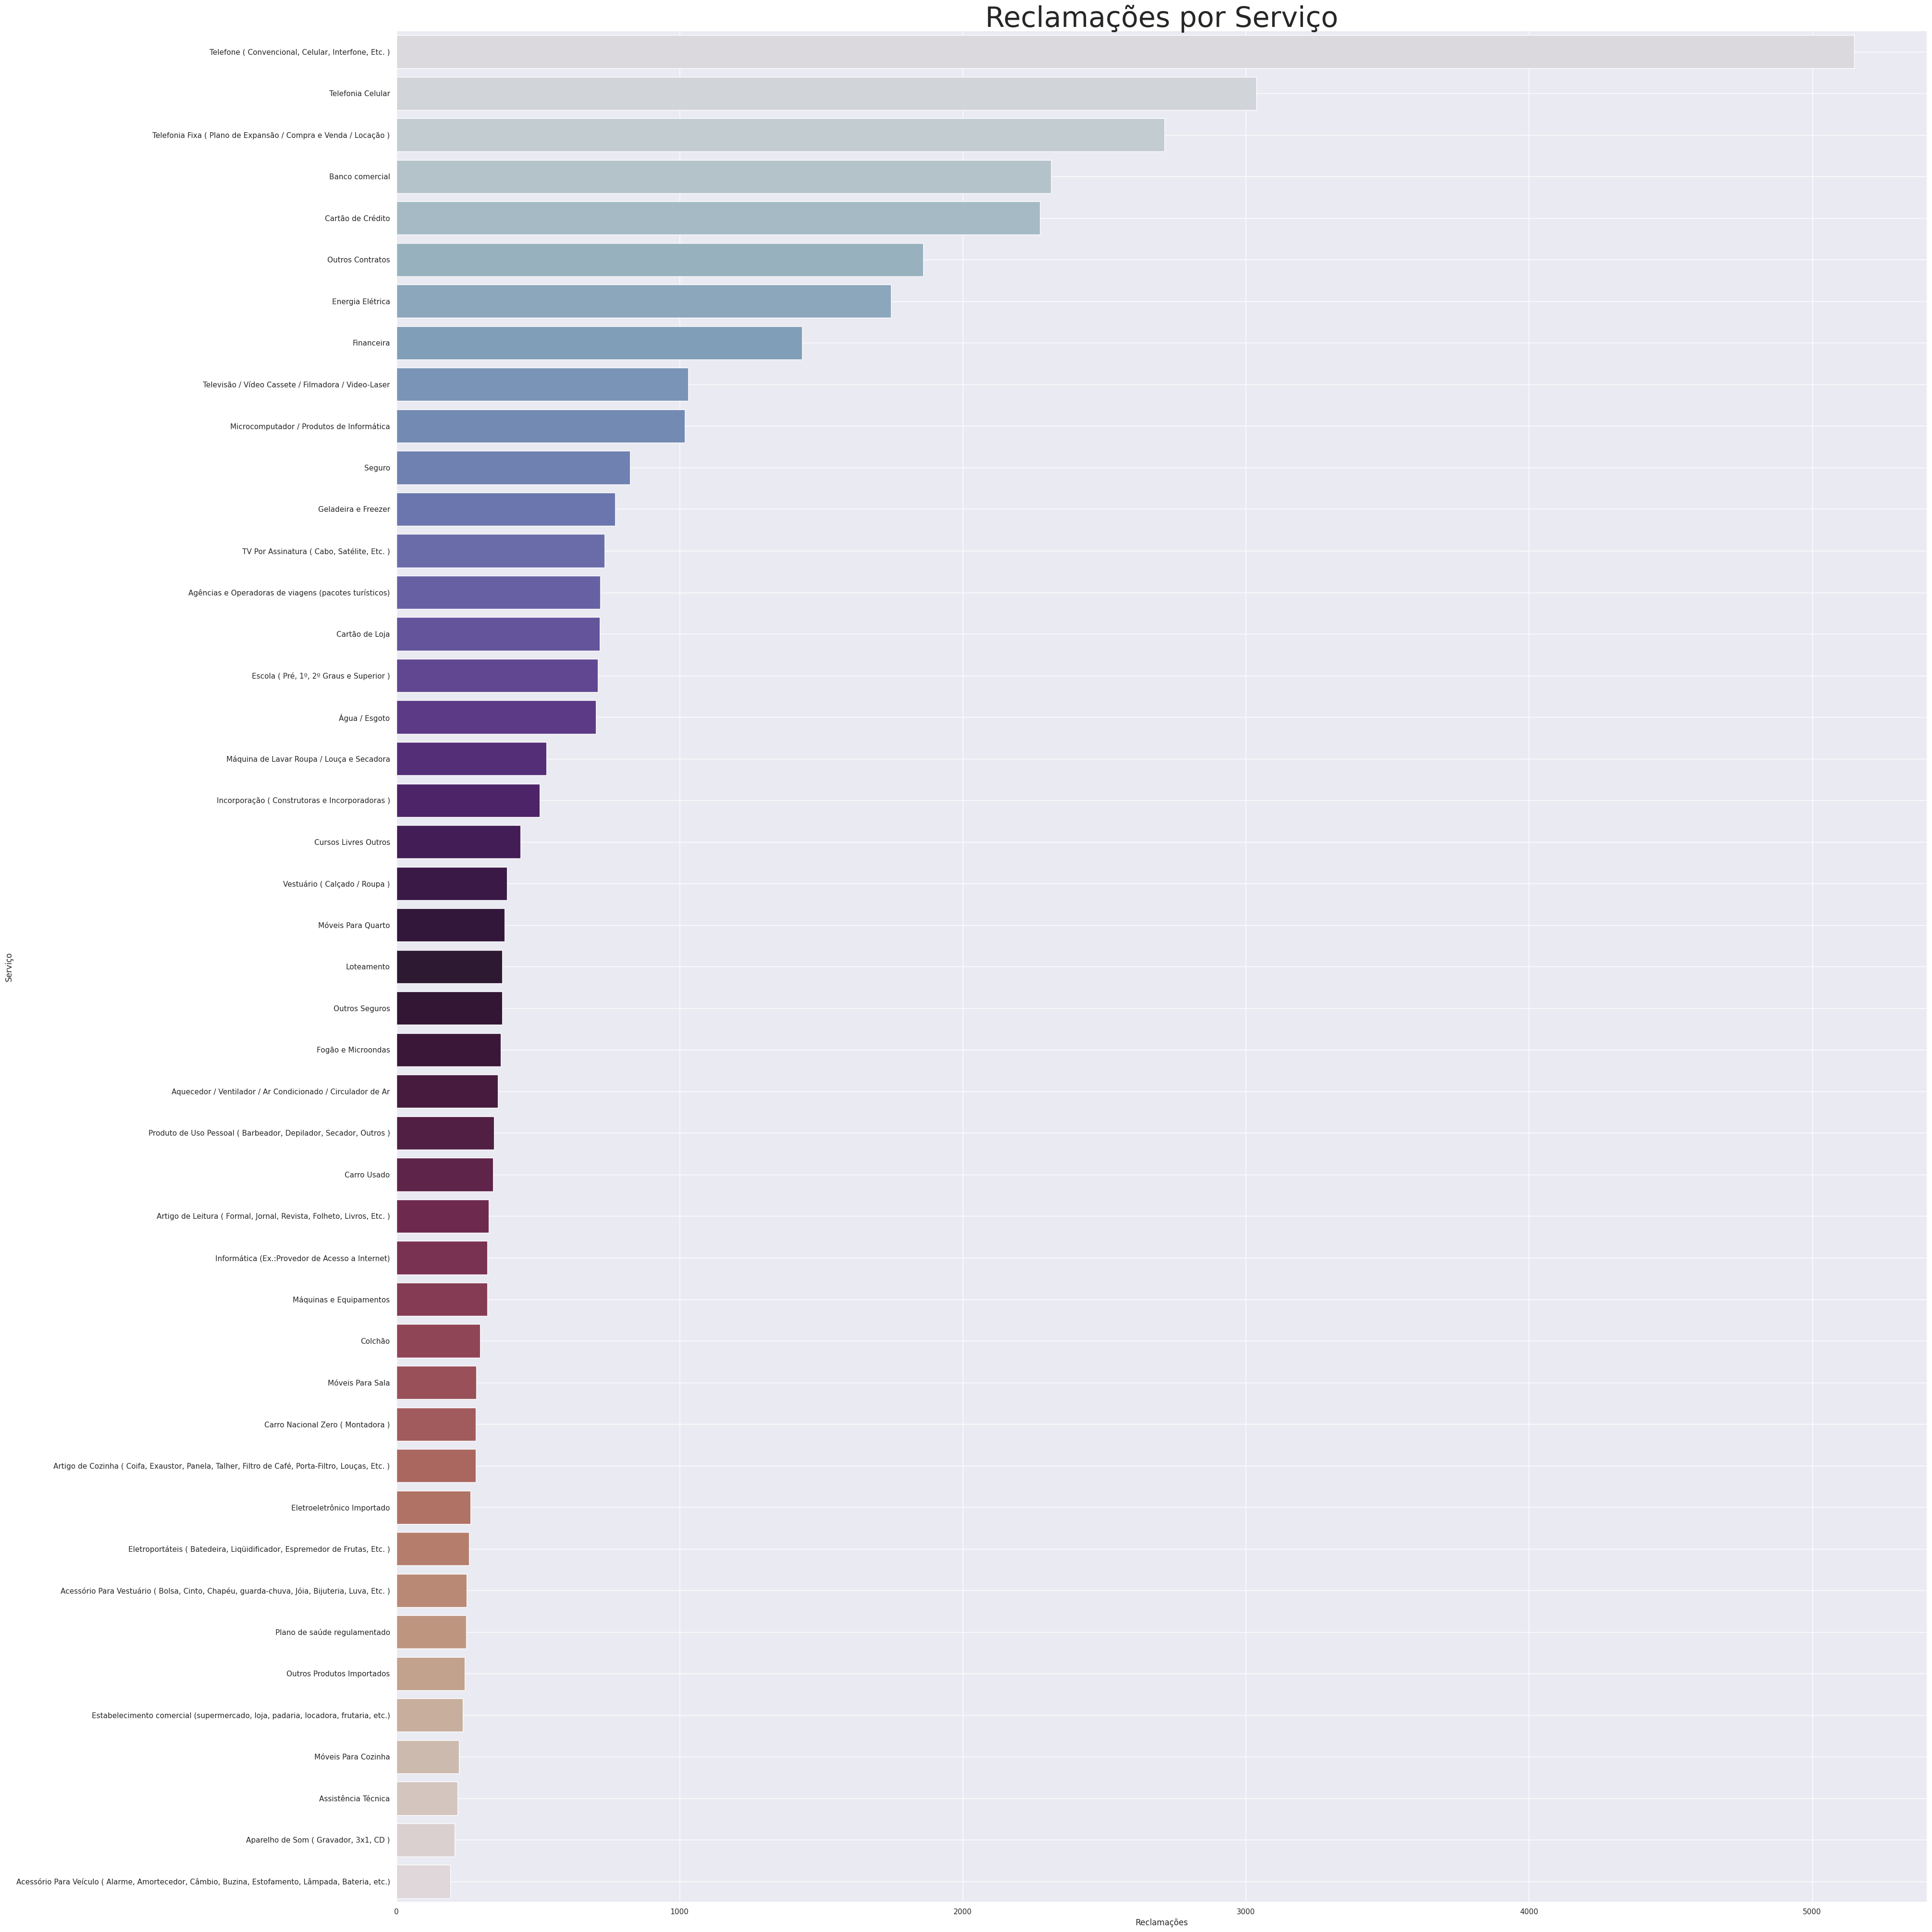

In [255]:
# Inicializa a figura do matplotlib
f, ax = plt.subplots(figsize=(40,40))
# Inicializa estilo do seaborn
sns.set(font_scale=3.5)
# carrega o dataset
graph = sns.countplot(y = "serviço", data=df_servico,
              order = df_servico["serviço"].value_counts().index[:45], 
              palette='twilight')


ax.grid(True)
ax.set_title("Reclamações por Serviço")
ax.set_ylabel('Serviço')
ax.set_xlabel('Reclamações')
plt.tight_layout(pad=0)
plt.savefig("Serviço_barplot.png")
plt.show()

# **Conclusão**


Com base nas WordClouds analisadas neste estudo de NLP, podemos concluir que as empresas Claro SA, Telefonica Brasil SA, TIM Celular SA e Via Varejo SA foram as que tiveram o maior número de reclamações registradas. Além disso, a análise das WordClouds revelou que os serviços mais frequentemente mencionados nas reclamações foram: telefonia convencional, celular, interfone, planos de expansão, compra e venda, e locação. O estudo também aponta que os estados de São Paulo e Goiás registraram o maior número de reclamações.

Esses resultados sugerem que o serviço de telefonia é a principal fonte de insatisfação dos clientes, o que é reforçado pelos gráficos de barras que mostram os problemas mais frequentes relatados nas reclamações.